In [1]:
from functions import *
from features_dupe import *
import seaborn as sns
import matplotlib.pyplot as plt

# extract subnational population data from census website

In [2]:
ind_pops = extract_census_data('india-adm2')

In [3]:
ind_pops

,Country,GEO_MATCH,ADM1 Name,ADM2 Name,ADM2 Population 2020
2,INDIA,INDIA_ANDAMAN AND NICOBAR ISLANDS_NICOBAR,ANDAMAN AND NICOBAR ISLANDS,NICOBAR,36770
3,INDIA,INDIA_ANDAMAN AND NICOBAR ISLANDS_NORTH AND M...,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,105389
4,INDIA,INDIA_ANDAMAN AND NICOBAR ISLANDS_SOUTH ANDAMAN,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMAN,237673
6,INDIA,INDIA_ANDHRA PRADESH_SRIKAKULAM,ANDHRA PRADESH,SRĪKĀKULAM,2753734
7,INDIA,INDIA_ANDHRA PRADESH_VIZIANAGARAM,ANDHRA PRADESH,VIZIANAGARAM,2388380
...,...,...,...,...,...
706,INDIA,INDIA_WEST BENGAL_HAORA,WEST BENGAL,HĀORA,5138725
707,INDIA,INDIA_WEST BENGAL_KOLKATA,WEST BENGAL,KOLKATA,4764356
708,INDIA,INDIA_WEST BENGAL_SOUTH TWENTY-FOUR PARGANAS,WEST BENGAL,SOUTH TWENTY-FOUR PARGANAS,8647774
709,INDIA,INDIA_WEST BENGAL_PASCHIM MEDINIPUR,WEST BENGAL,PASCHIM MEDINIPUR,6265448


# read papua new guinea ADM3 shapefile 

In [4]:
ind_shapes = gpd.read_file('./ind/India_adm2_uscb_2016.shp')[['GEO_MATCH', 'geometry']]

In [5]:
ind_shapes

,GEO_MATCH,geometry
0,INDIA_ANDAMAN AND NICOBAR ISLANDS_NICOBAR,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,INDIA_ANDAMAN AND NICOBAR ISLANDS_NORTH AND M...,"MULTIPOLYGON (((92.84585 12.14756, 92.84553 12..."
2,INDIA_ANDAMAN AND NICOBAR ISLANDS_SOUTH ANDAMAN,"MULTIPOLYGON (((92.51583 10.89764, 92.51611 10..."
3,INDIA_ANDHRA PRADESH_ANANTAPUR,"POLYGON ((78.13678 14.93803, 78.13632 14.93281..."
4,INDIA_ANDHRA PRADESH_CHITTOOR,"POLYGON ((79.43324 13.87771, 79.43959 13.88052..."
...,...,...
669,INDIA_WEST BENGAL_PASCHIM MEDINIPUR,"POLYGON ((87.52031 22.92711, 87.52206 22.92144..."
670,INDIA_WEST BENGAL_PURBA MEDINIPUR,"MULTIPOLYGON (((88.14139 22.02639, 88.14250 22..."
671,INDIA_WEST BENGAL_PURULIYA,"POLYGON ((86.79568 23.69348, 86.80138 23.69119..."
672,INDIA_WEST BENGAL_SOUTH TWENTY-FOUR PARGANAS,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."


# merge dataframes together

In [6]:
ind_complete = ind_pops.merge(ind_shapes, left_on='GEO_MATCH', right_on='GEO_MATCH', how='inner')

In [7]:
ind_complete

,Country,GEO_MATCH,ADM1 Name,ADM2 Name,ADM2 Population 2020,geometry
0,INDIA,INDIA_ANDAMAN AND NICOBAR ISLANDS_NICOBAR,ANDAMAN AND NICOBAR ISLANDS,NICOBAR,36770,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,INDIA,INDIA_ANDAMAN AND NICOBAR ISLANDS_NORTH AND M...,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,105389,"MULTIPOLYGON (((92.84585 12.14756, 92.84553 12..."
2,INDIA,INDIA_ANDAMAN AND NICOBAR ISLANDS_SOUTH ANDAMAN,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMAN,237673,"MULTIPOLYGON (((92.51583 10.89764, 92.51611 10..."
3,INDIA,INDIA_ANDHRA PRADESH_SRIKAKULAM,ANDHRA PRADESH,SRĪKĀKULAM,2753734,"POLYGON ((84.71903 19.09584, 84.71902 19.09514..."
4,INDIA,INDIA_ANDHRA PRADESH_VIZIANAGARAM,ANDHRA PRADESH,VIZIANAGARAM,2388380,"POLYGON ((83.77050 18.90159, 83.77589 18.89049..."
...,...,...,...,...,...,...
669,INDIA,INDIA_WEST BENGAL_HAORA,WEST BENGAL,HĀORA,5138725,"MULTIPOLYGON (((87.92568 22.42483, 87.92539 22..."
670,INDIA,INDIA_WEST BENGAL_KOLKATA,WEST BENGAL,KOLKATA,4764356,"POLYGON ((88.40731 22.55647, 88.40570 22.55393..."
671,INDIA,INDIA_WEST BENGAL_SOUTH TWENTY-FOUR PARGANAS,WEST BENGAL,SOUTH TWENTY-FOUR PARGANAS,8647774,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."
672,INDIA,INDIA_WEST BENGAL_PASCHIM MEDINIPUR,WEST BENGAL,PASCHIM MEDINIPUR,6265448,"POLYGON ((87.52031 22.92711, 87.52206 22.92144..."


# apply validation code

In [8]:
ind_complete = gpd.GeoDataFrame(ind_complete)
ind = validate_ind(ind_complete, verbose=True)

Processing input data
Finding overlapping polygons
The Tamang people group had a population greater than all ADM2 boundaries they intersected. They are invalid.
The Monpa people group had a population greater than all ADM2 boundaries they intersected. They are invalid.


In [9]:
ind

,People Group,Alpha-3 Code,People Group Population,Country,geometry,ADM2 Boundaries Present,Total Boundary Population,Valid People Group,Percent Boundary Population
1,Balmiki (Awadhi),IND,1725000,India,"MULTIPOLYGON (((78.03374 27.78847, 78.03361 27...","[PALWAL, GAUTAM BUDDHA NAGAR, BULANDSHAHR, ALĪ...",23132721,True,7.456970
23,Faqir,IND,113000,India,"MULTIPOLYGON (((77.04568 30.14090, 77.13762 29...","[SIWĀN, SĀRAN, BHOJPUR, BUXAR, KAIMUR (BHABUA)...",353965715,True,0.031924
24,Namasudra,IND,4245000,India,"MULTIPOLYGON (((88.54657 21.97266, 88.55792 21...","[SRĪKĀKULAM, VIZIANAGARAM, VISHĀKHAPATNAM, EAS...",203365566,True,2.087374
25,Yadava (Magahi),IND,1345000,India,"MULTIPOLYGON (((85.73011 26.77942, 85.73003 26...","[PŪRBA CHAMPĀRAN, SHEOHAR, SĪTĀMARHI, MADHUBAN...",131466846,True,1.023072
26,Garia,IND,4925000,India,"MULTIPOLYGON (((95.99442 27.75737, 96.00374 27...","[WEST SIANG, CHANGLANG, LONGDING, TIRĀP, LOHIT...",38100100,True,12.926475
...,...,...,...,...,...,...,...,...,...
11878,Kampo,IND,1440000,India,"MULTIPOLYGON (((84.40065 20.60664, 84.42817 20...","[SRĪKĀKULAM, VIZIANAGARAM, VISHĀKHAPATNAM, NAY...",28193864,True,5.107494
11879,Gurika,IND,187000,India,"MULTIPOLYGON (((78.72219 17.68251, 78.73179 17...","[GULBARGA, MEDAK, HYDERĀBĀD, RANGAREDDY, MAHBŪ...",23706545,True,0.788812
11881,Kayalar,IND,47000,India,"MULTIPOLYGON (((78.06069 8.36517, 78.05945 8.3...","[VIRUDHUNAGAR, RĀMANĀTHAPURAM, THOOTHUKUDI, TI...",8732671,True,0.538209
11980,Ahangar,IND,10000,India,"MULTIPOLYGON (((74.88494 34.30711, 74.88720 34...","[BADGAM, PULWAMA, BĀRAMŪLA, SRĪNAGAR, GANDERBA...",5556885,True,0.179957


# results

* test worked at the ADM3 level for Papua New Guinea
* interesting results ~ 15 people groups are invalid (due to potentially large/inflated population numbers)
* not sure if replicable for all people groups. method heavily relied on data avaiable through the Spatial Data Respository.

### PNG people groups with greatest population difference (>100% of total boundary population) 

In [11]:
ind_sorted = ind.sort_values(by='Percent Boundary Population', ascending=False)
ind_sorted.head()

,People Group,Alpha-3 Code,People Group Population,Country,geometry,ADM2 Boundaries Present,Total Boundary Population,Valid People Group,Percent Boundary Population
2229,Tamang,IND,267000,India,"MULTIPOLYGON (((88.75629 27.72847, 88.74231 27...",[NORTH DISTRICT],45945,False,581.129611
10187,Monpa,IND,167000,India,"MULTIPOLYGON (((91.99564 27.72594, 92.00682 27...","[TAWANG, WEST KAMENG]",156193,False,106.919004
9801,Laccadive,IND,63000,India,"MULTIPOLYGON (((73.66095 10.81198, 73.66125 10...",[LAKSHADWEEP],64031,True,98.389842
9710,Moravian Christian,IND,323000,India,"MULTIPOLYGON (((79.43972 35.94423, 79.44455 35...","[LĀHUL AND SPITI, LADĀKH, KARGIL]",347358,True,92.987638
3147,Nicobarese,IND,33000,India,"MULTIPOLYGON (((92.79139 9.24194, 92.80099 9.2...",[NICOBAR],36770,True,89.747076


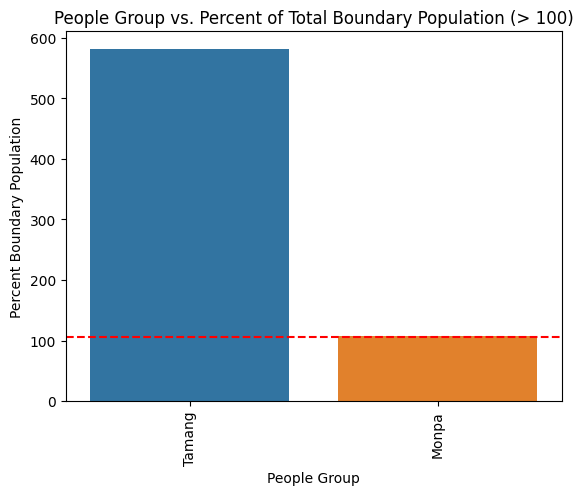

In [12]:
ind_above_100 = ind_sorted[ind_sorted['Percent Boundary Population'] > 100]
sns.barplot(data=ind_above_100, x='People Group', y='Percent Boundary Population')
plt.xticks(rotation=90);
plt.title('People Group vs. Percent of Total Boundary Population (> 100)')
plt.axhline(y=105, color='r', linestyle='--'); # 5% error

In [13]:
# number of people groups in India that failed the ADM3 test
ind_above_100.shape[0]

2

In [14]:
ind_above_100.explore(color='red')